In [1]:
pip install rasterio numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 21.6 MB/s eta 0:00:00


In [2]:
!pip install earthpy
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

np.seterr(divide='ignore', invalid='ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.6 MB/s eta 0:00:00


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load Bands
band2 = rasterio.open('Landsat8_2024_SR_B2.tif')  # Blue band
band3 = rasterio.open('Landsat8_2024_SR_B3.tif')  # Green band
band4 = rasterio.open('Landsat8_2024_SR_B4.tif')  # Red band
band5 = rasterio.open('Landsat8_2024_SR_B5.tif')  # NIR band
band6 = rasterio.open('Landsat8_2024_SR_B6.tif')  # SWIR1 band
band7 = rasterio.open('Landsat8_2024_SR_B7.tif')  # SWIR2 band

# Read bands as arrays
b2 = band2.read(1).astype('float32')
b3 = band3.read(1).astype('float32')
b4 = band4.read(1).astype('float32')
b5 = band5.read(1).astype('float32')
b6 = band6.read(1).astype('float32')
b7 = band7.read(1).astype('float32')

In [4]:
l=[]
l.append(b2)
l.append(b3)
l.append(b4)
l.append(b5)
l.append(b6)
l.append(b7)
arr_bef = np.stack(l)
arr_bef.shape

(6, 562, 540)

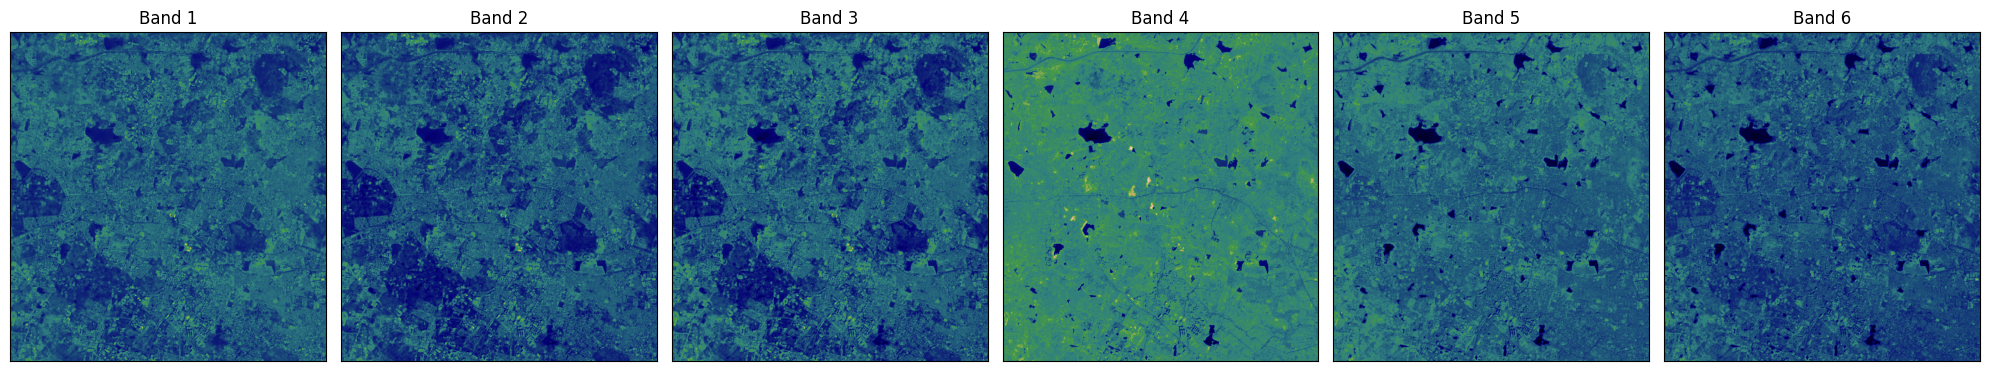

In [5]:
ep.plot_bands(arr_bef, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

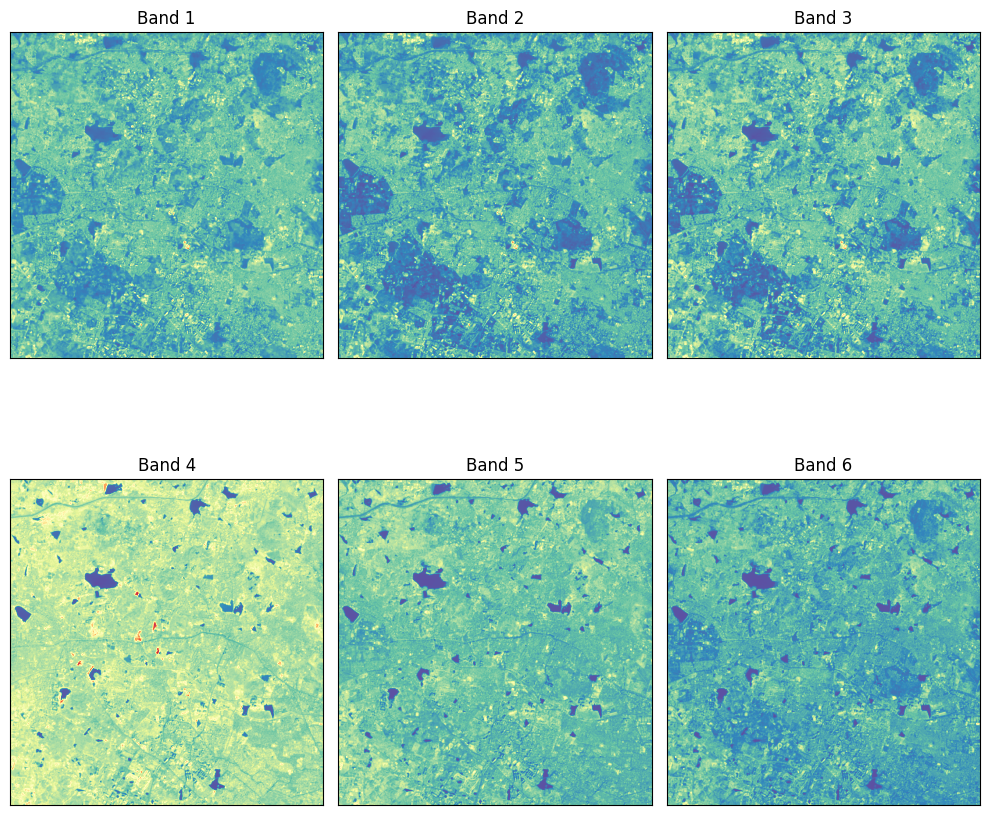

In [6]:
ep.plot_bands(arr_bef, cmap='Spectral_r', cols=3, figsize=(10, 10), cbar=False)

plt.show()

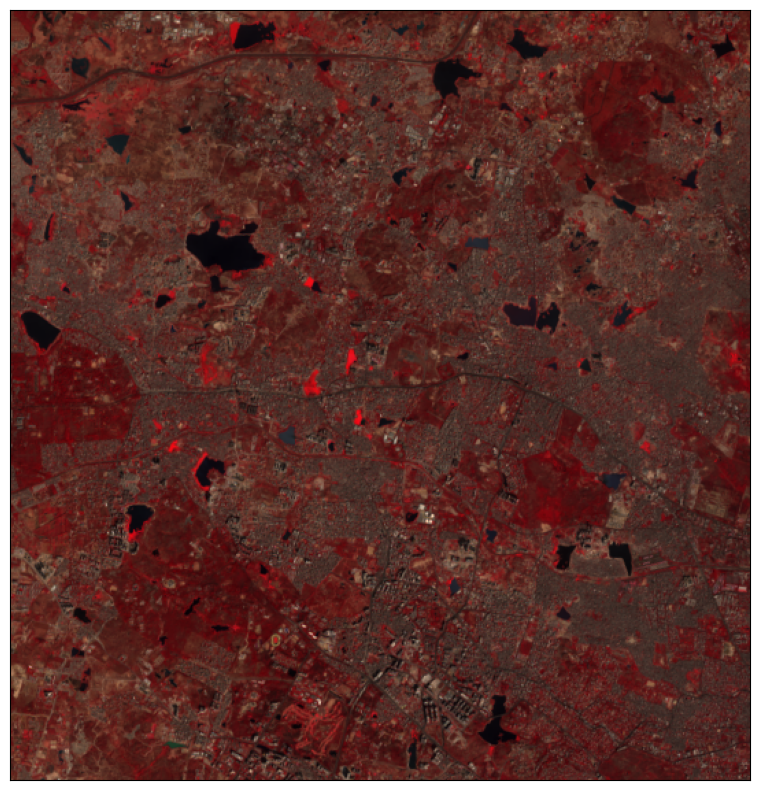

In [7]:
ep.plot_rgb(arr_bef, rgb=(3, 2, 1), figsize=(10, 10))

plt.show()

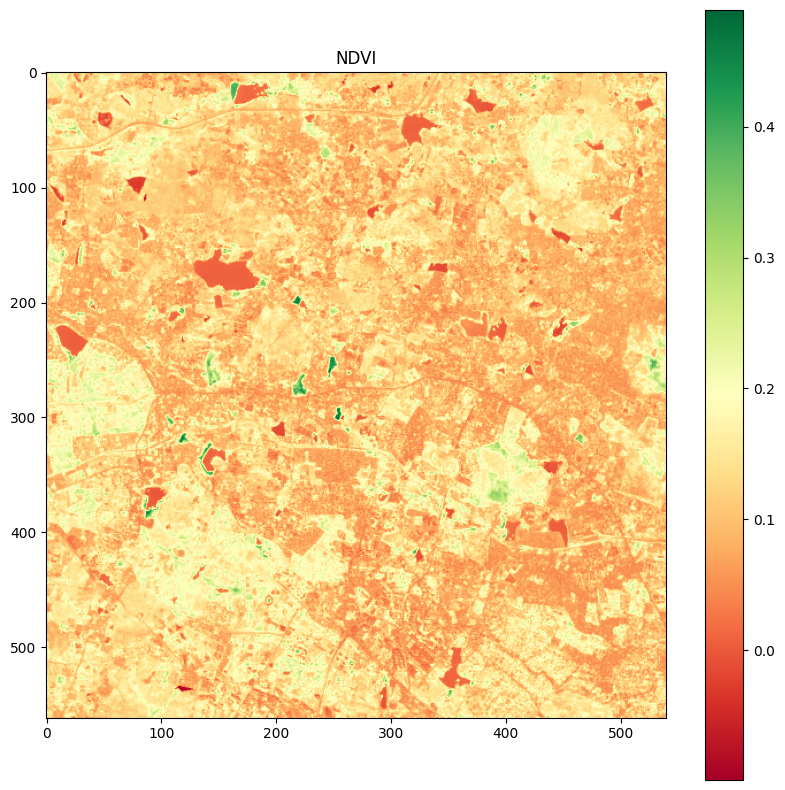

In [8]:
ndvi = (b5 - b4) / (b5 + b4 + 1e-10)

# Display NDVI
plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')  # Red-to-Green color map
plt.colorbar()
plt.title('NDVI')
plt.show()

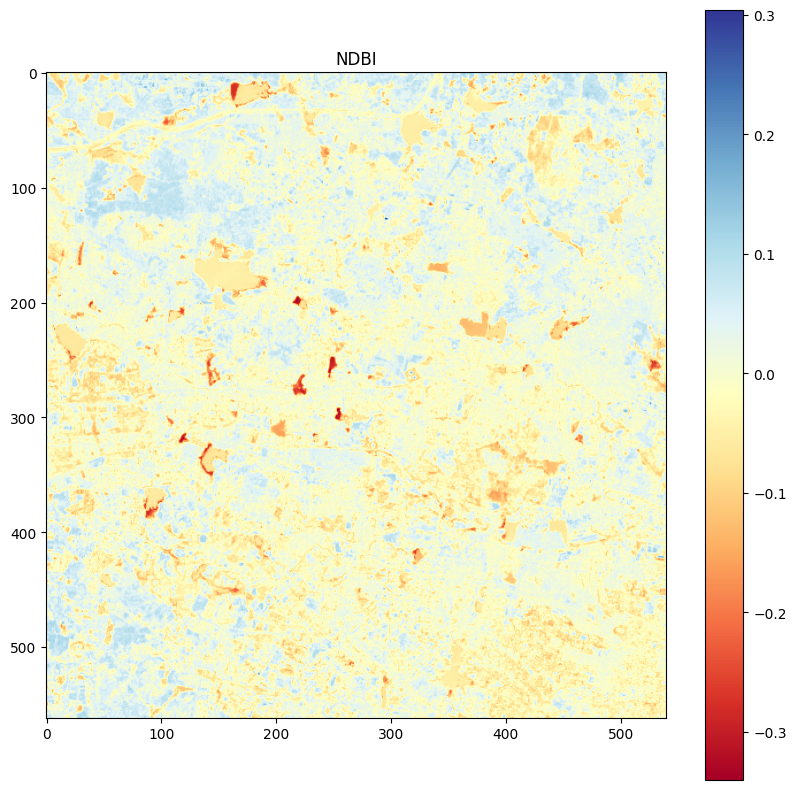

In [9]:
# Avoid division by zero
ndbi = (b6 - b5) / (b6 + b5 + 1e-10)

# Display NDBI
plt.figure(figsize=(10, 10))
plt.imshow(ndbi, cmap='RdYlBu')  # Red-to-Blue color map
plt.colorbar()
plt.title('NDBI')
plt.show()

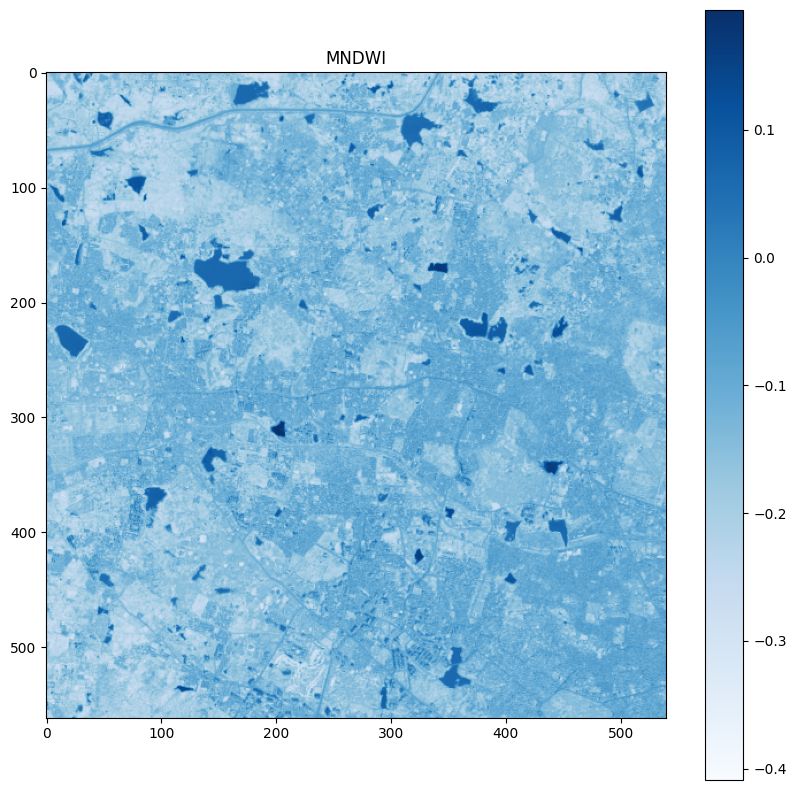

In [10]:
# Avoid division by zero
mndwi = (b3 - b6) / (b3 + b6 + 1e-10)

# Display MNDWI
plt.figure(figsize=(10, 10))
plt.imshow(mndwi, cmap='Blues')  # Blu
plt.colorbar()
plt.title('MNDWI')
plt.show()


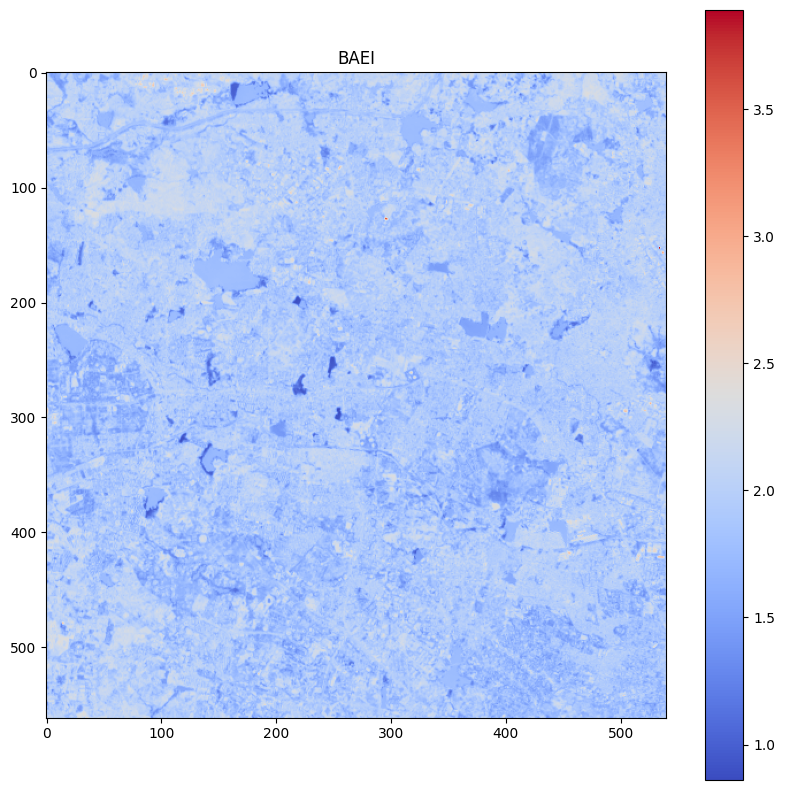

In [11]:
baei = (b6 + b7) / (b5 + 1e-10)

# Display BAEI
plt.figure(figsize=(10, 10))
plt.imshow(baei, cmap='coolwarm')  # Custom color map
plt.colorbar()
plt.title('BAEI')
plt.show()


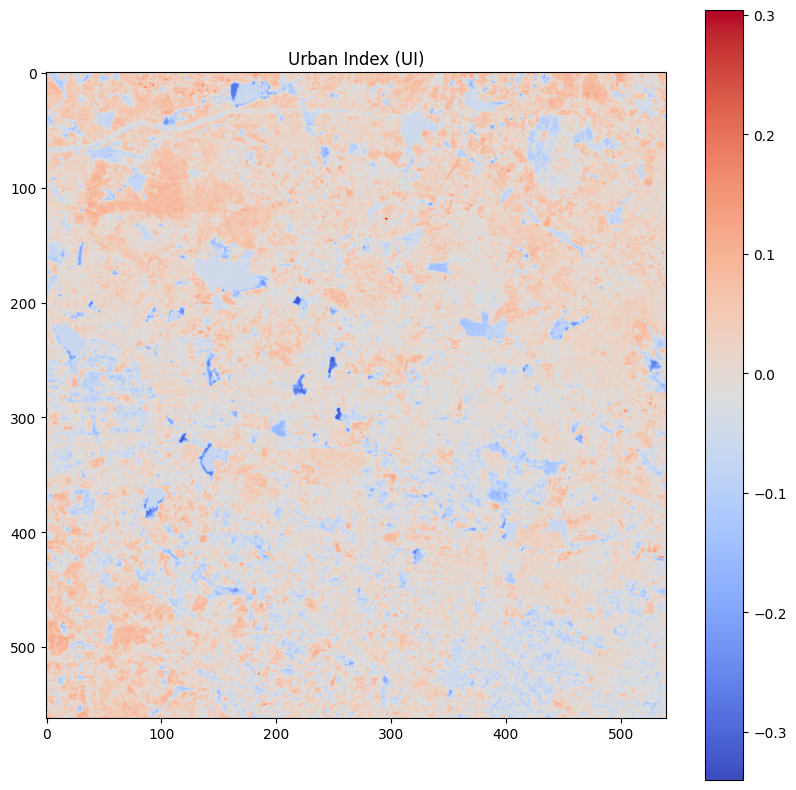

In [12]:
# Assuming b5 (NIR), b6 (SWIR1), and other required bands are already defined and imported

# Calculate the Urban Index (UI)
ui = (b6 - b5) / (b6 + b5 + 1e-10)  # Adding a small number to avoid division by zero

# Display the Urban Index (UI)
plt.figure(figsize=(10, 10))
plt.imshow(ui, cmap='coolwarm')  # Using the 'coolwarm' colormap for visualization
plt.colorbar()
plt.title('Urban Index (UI)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Year-to-Year Urbanization Change:
Urbanization change from 2014 to 2015: -10.29%
Urbanization change from 2015 to 2016: 19.88%
Urbanization change from 2016 to 2017: -8.57%
Urbanization change from 2017 to 2018: 0.56%
Urbanization change from 2018 to 2019: -0.62%
Urbanization change from 2019 to 2020: 13.10%
Urbanization change from 2020 to 2021: -4.37%
Urbanization change from 2021 to 2022: 66.82%
Urbanization change from 2022 to 2023: -62.41%
Urbanization change from 2023 to 2024: -6.56%

Urbanization Change from Base Year (2014):
Urbanization change from 2014 to 2014: 0.00%
Urbanization change from 2014 to 2015: -10.29%
Urbanization change from 2014 to 2016: 9.60%
Urbanization change from 2014 to 2017: 1.03%
Urbanization change from 2014 to 2018: 1.59%
Urbanization change from 2014 to 2019: 0.97%
Urbanization change from 2014 to 2020: 14.07%
Urbanization change from 2014 to 2021: 9.70%
Urbanization change from 2014 to 2022: 76.52%
Urbanization change from 2014 to 2023: 14.11%
Urbani

<ipython-input-13-c2dacb9e7c34>:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_to_year_labels, y=year_to_year_changes, palette='viridis')


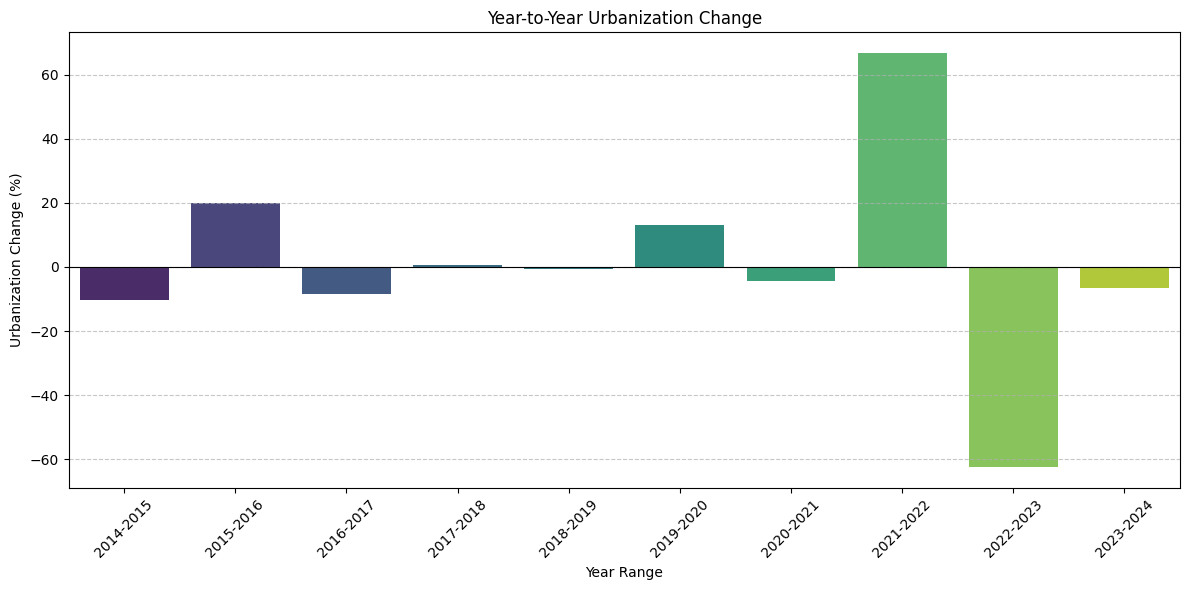

<ipython-input-13-c2dacb9e7c34>:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=base_year_labels, y=base_year_changes, palette='magma')


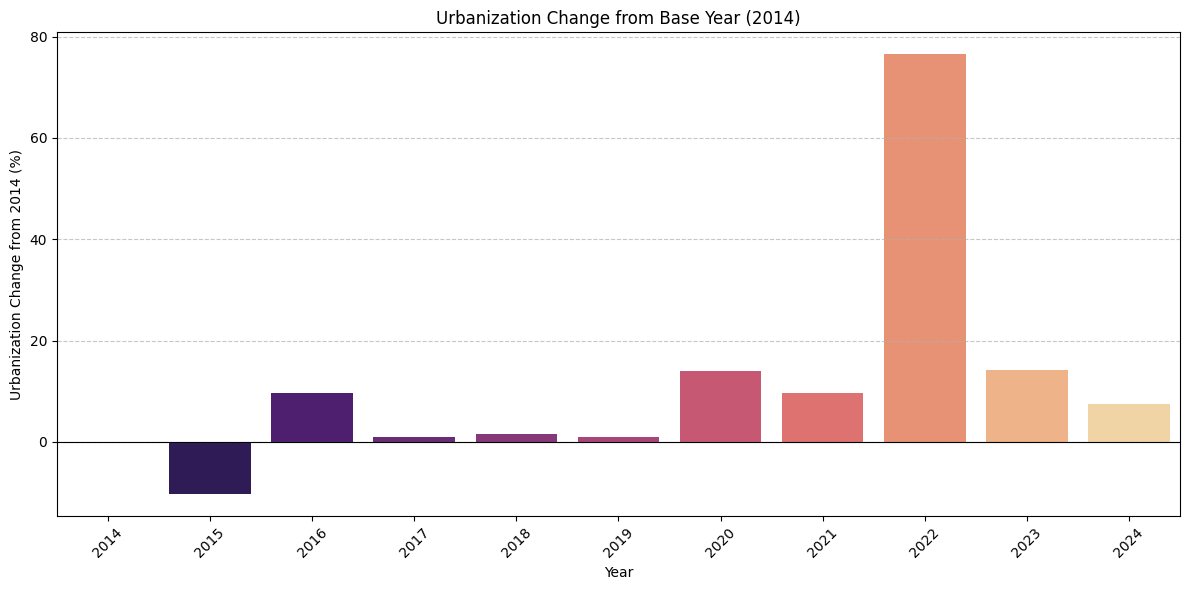

In [13]:
import numpy as np
import rasterio
from sklearn.cluster import KMeans

# List of years
years = range(2014, 2025)

# Function to compute indices
def compute_indices(b2, b3, b4, b5, b6, b7):
    # NDVI calculation
    ndvi = (b5 - b4) / (b5 + b4 + 1e-10)
    # NDBI calculation
    ndbi = (b6 - b5) / (b6 + b5 + 1e-10)
    # MNDWI calculation
    mndwi = (b3 - b6) / (b3 + b6 + 1e-10)
    # BAEI calculation
    baei = (b6 + b7) / (b5 + 1e-10)
    # Urban Index (UI) calculation
    ui = (b6 - b5) / (b6 + b5 + 1e-10)
    return ndvi, ndbi, mndwi, baei, ui

# Initialize dictionaries to store indices
indices_data = {}

# Compute indices for each year and store them
for year in years:
    # Load Bands
    band2 = rasterio.open(f'Landsat8_{year}_SR_B2.tif')  # Blue band
    band3 = rasterio.open(f'Landsat8_{year}_SR_B3.tif')  # Green band
    band4 = rasterio.open(f'Landsat8_{year}_SR_B4.tif')  # Red band
    band5 = rasterio.open(f'Landsat8_{year}_SR_B5.tif')  # NIR band
    band6 = rasterio.open(f'Landsat8_{year}_SR_B6.tif')  # SWIR1 band
    band7 = rasterio.open(f'Landsat8_{year}_SR_B7.tif')  # SWIR2 band

    # Read bands as arrays
    b2 = band2.read(1).astype('float32')
    b3 = band3.read(1).astype('float32')
    b4 = band4.read(1).astype('float32')
    b5 = band5.read(1).astype('float32')
    b6 = band6.read(1).astype('float32')
    b7 = band7.read(1).astype('float32')

    # Compute indices
    ndvi, ndbi, mndwi, baei, ui = compute_indices(b2, b3, b4, b5, b6, b7)

    # Store the computed indices
    indices_data[year] = {
        'NDVI': ndvi,
        'NDBI': ndbi,
        'MNDWI': mndwi,
        'BAEI': baei,
        'UI': ui
    }

# Prepare data for clustering
all_indices = []

for year in years:
    data = np.stack([
        indices_data[year]['NDVI'].flatten(),
        indices_data[year]['NDBI'].flatten(),
        indices_data[year]['MNDWI'].flatten(),
        indices_data[year]['BAEI'].flatten(),
        indices_data[year]['UI'].flatten()
    ], axis=1)

    all_indices.append(data)

# Convert list to a numpy array
all_indices = np.vstack(all_indices)

# Unsupervised Learning: K-means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)  # 2 clusters: Urban and Non-Urban
kmeans_labels = kmeans.fit_predict(all_indices)

# Reshape labels back to image dimensions
urban_areas = {}
for i, year in enumerate(years):
    reshaped_labels = kmeans_labels[i * data.shape[0]:(i + 1) * data.shape[0]].reshape(indices_data[year]['NDVI'].shape)
    urban_areas[year] = reshaped_labels

# Calculate Year-to-Year Urbanization Change
urban_change_percentages = []
for i in range(len(years) - 1):
    year1 = years[i]
    year2 = years[i + 1]

    urban_area_1 = np.sum(urban_areas[year1] == 1)
    urban_area_2 = np.sum(urban_areas[year2] == 1)

    total_pixels = urban_areas[year1].size

    urban_percentage_1 = (urban_area_1 / total_pixels) * 100
    urban_percentage_2 = (urban_area_2 / total_pixels) * 100

    change_percentage = urban_percentage_2 - urban_percentage_1
    urban_change_percentages.append((year1, year2, change_percentage))

print("Year-to-Year Urbanization Change:")
for year1, year2, change in urban_change_percentages:
    print(f"Urbanization change from {year1} to {year2}: {change:.2f}%")

# Calculate Urbanization Change from Base Year (2014)
urban_change_from_base = []
base_year = 2014
base_urban_area = np.sum(urban_areas[base_year] == 1)
total_pixels = urban_areas[base_year].size

for year in years:
    urban_area = np.sum(urban_areas[year] == 1)
    urban_percentage = (urban_area / total_pixels) * 100
    base_urban_percentage = (base_urban_area / total_pixels) * 100
    change_percentage = urban_percentage - base_urban_percentage
    urban_change_from_base.append((year, change_percentage))

print("\nUrbanization Change from Base Year (2014):")
for year, change in urban_change_from_base:
    print(f"Urbanization change from 2014 to {year}: {change:.2f}%")

import matplotlib.pyplot as plt
import seaborn as sns

# Convert year-to-year urban change data to lists for visualization
year_to_year_changes = [change for _, _, change in urban_change_percentages]
year_to_year_labels = [f"{year1}-{year2}" for year1, year2, _ in urban_change_percentages]

# Plot Year-to-Year Urbanization Change
plt.figure(figsize=(12, 6))
sns.barplot(x=year_to_year_labels, y=year_to_year_changes, palette='viridis')
plt.title("Year-to-Year Urbanization Change")
plt.xlabel("Year Range")
plt.ylabel("Urbanization Change (%)")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Convert urbanization change from base year data to lists for visualization
base_year_changes = [change for _, change in urban_change_from_base]
base_year_labels = [str(year) for year, _ in urban_change_from_base]

# Plot Urbanization Change from Base Year (2014)
plt.figure(figsize=(12, 6))
sns.barplot(x=base_year_labels, y=base_year_changes, palette='magma')
plt.title("Urbanization Change from Base Year (2014)")
plt.xlabel("Year")
plt.ylabel("Urbanization Change from 2014 (%)")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


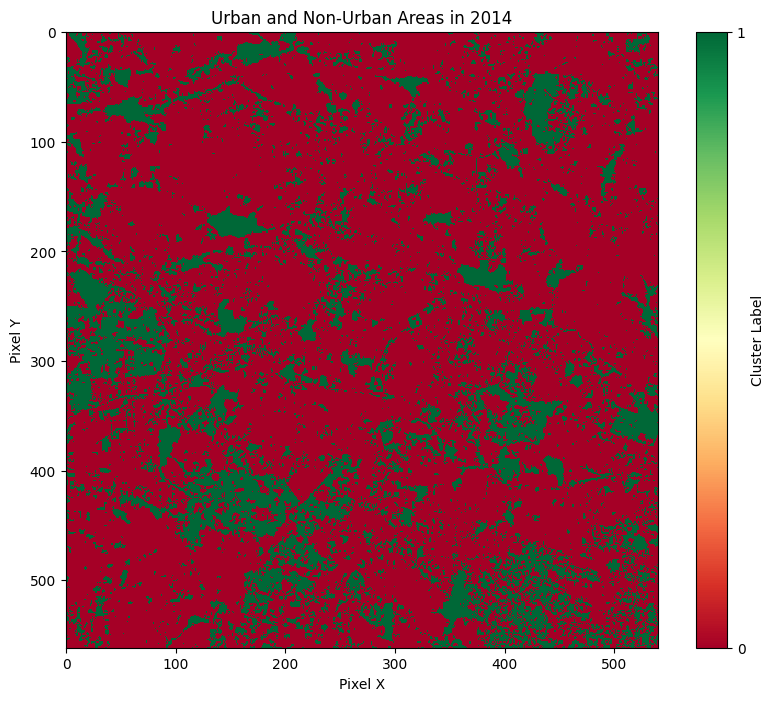

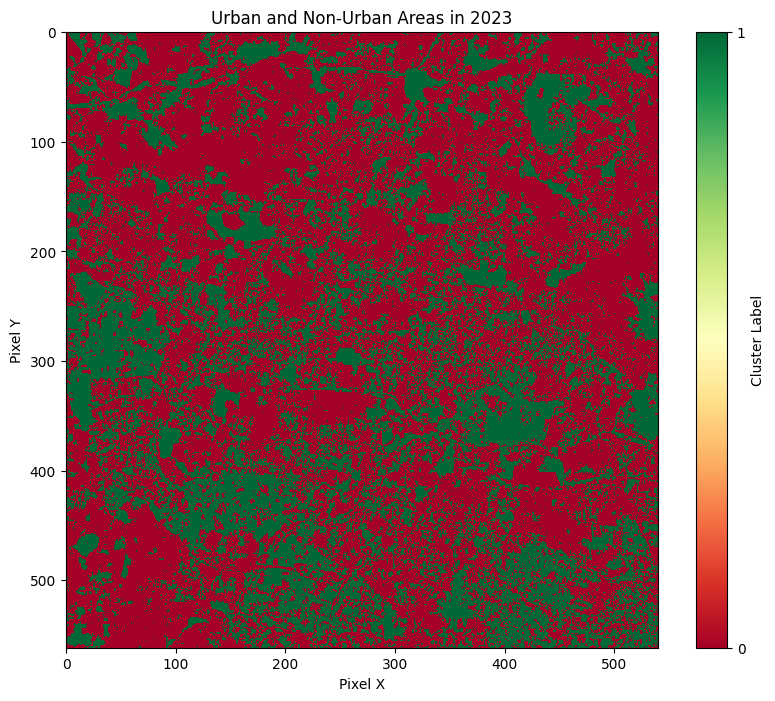

In [15]:
import numpy as np
import rasterio
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# List of years
years = range(2014, 2025)

# Function to compute indices
def compute_indices(b2, b3, b4, b5, b6, b7):
    # NDVI calculation
    ndvi = (b5 - b4) / (b5 + b4 + 1e-10)
    # NDBI calculation
    ndbi = (b6 - b5) / (b6 + b5 + 1e-10)
    # MNDWI calculation
    mndwi = (b3 - b6) / (b3 + b6 + 1e-10)
    # BAEI calculation
    baei = (b6 + b7) / (b5 + 1e-10)
    # Urban Index (UI) calculation
    ui = (b6 - b5) / (b6 + b5 + 1e-10)
    return ndvi, ndbi, mndwi, baei, ui

# Initialize dictionaries to store indices
indices_data = {}

# Compute indices for each year and store them
for year in years:
    # Load Bands
    band2 = rasterio.open(f'Landsat8_{year}_SR_B2.tif')  # Blue band
    band3 = rasterio.open(f'Landsat8_{year}_SR_B3.tif')  # Green band
    band4 = rasterio.open(f'Landsat8_{year}_SR_B4.tif')  # Red band
    band5 = rasterio.open(f'Landsat8_{year}_SR_B5.tif')  # NIR band
    band6 = rasterio.open(f'Landsat8_{year}_SR_B6.tif')  # SWIR1 band
    band7 = rasterio.open(f'Landsat8_{year}_SR_B7.tif')  # SWIR2 band

    # Read bands as arrays
    b2 = band2.read(1).astype('float32')
    b3 = band3.read(1).astype('float32')
    b4 = band4.read(1).astype('float32')
    b5 = band5.read(1).astype('float32')
    b6 = band6.read(1).astype('float32')
    b7 = band7.read(1).astype('float32')

    # Compute indices
    ndvi, ndbi, mndwi, baei, ui = compute_indices(b2, b3, b4, b5, b6, b7)

    # Store the computed indices
    indices_data[year] = {
        'NDVI': ndvi,
        'NDBI': ndbi,
        'MNDWI': mndwi,
        'BAEI': baei,
        'UI': ui
    }

# Prepare data for clustering
all_indices = []

for year in years:
    data = np.stack([
        indices_data[year]['NDVI'].flatten(),
        indices_data[year]['NDBI'].flatten(),
        indices_data[year]['MNDWI'].flatten(),
        indices_data[year]['BAEI'].flatten(),
        indices_data[year]['UI'].flatten()
    ], axis=1)

    all_indices.append(data)

# Convert list to a numpy array
all_indices = np.vstack(all_indices)

# Unsupervised Learning: K-means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)  # 2 clusters: Urban and Non-Urban
kmeans_labels = kmeans.fit_predict(all_indices)

# Reshape labels back to image dimensions
urban_areas = {}
for i, year in enumerate(years):
    reshaped_labels = kmeans_labels[i * data.shape[0]:(i + 1) * data.shape[0]].reshape(indices_data[year]['NDVI'].shape)
    urban_areas[year] = reshaped_labels

# Cluster Visualization for Selected Years
def plot_clustered_areas(year, urban_areas, title, cmap):
    clustered_image = urban_areas[year]

    # Plotting the clustered result
    plt.figure(figsize=(10, 8))
    plt.imshow(clustered_image, cmap=cmap, interpolation='nearest')
    plt.colorbar(label='Cluster Label', ticks=[0, 1], format='%d')
    plt.title(title)
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')
    plt.show()

# Visualize urban and non-urban areas for 2014 and 2023
plot_clustered_areas(2014, urban_areas, title='Urban and Non-Urban Areas in 2014', cmap='RdYlGn')
plot_clustered_areas(2023, urban_areas, title='Urban and Non-Urban Areas in 2023', cmap='RdYlGn')

In [16]:
import pandas as pd

# Create a DataFrame for urbanization changes
urban_change_df = pd.DataFrame(urban_change_percentages, columns=['Year1', 'Year2', 'Change'])

# Create lagged features for time series forecasting
urban_change_df['Lag_1'] = urban_change_df['Change'].shift(1)
urban_change_df.dropna(inplace=True)  # Drop rows with NaN values (first row)

# Define features and target variable
X = urban_change_df[['Lag_1']]
y = urban_change_df['Change']

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3009.572028465425


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5slnvui3/5mvndubs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5slnvui3/nvoynczf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20082', 'data', 'file=/tmp/tmp5slnvui3/5mvndubs.json', 'init=/tmp/tmp5slnvui3/nvoynczf.json', 'output', 'file=/tmp/tmp5slnvui3/prophet_modelynpf0mmr/prophet_model-20240910141858.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:18:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:18:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

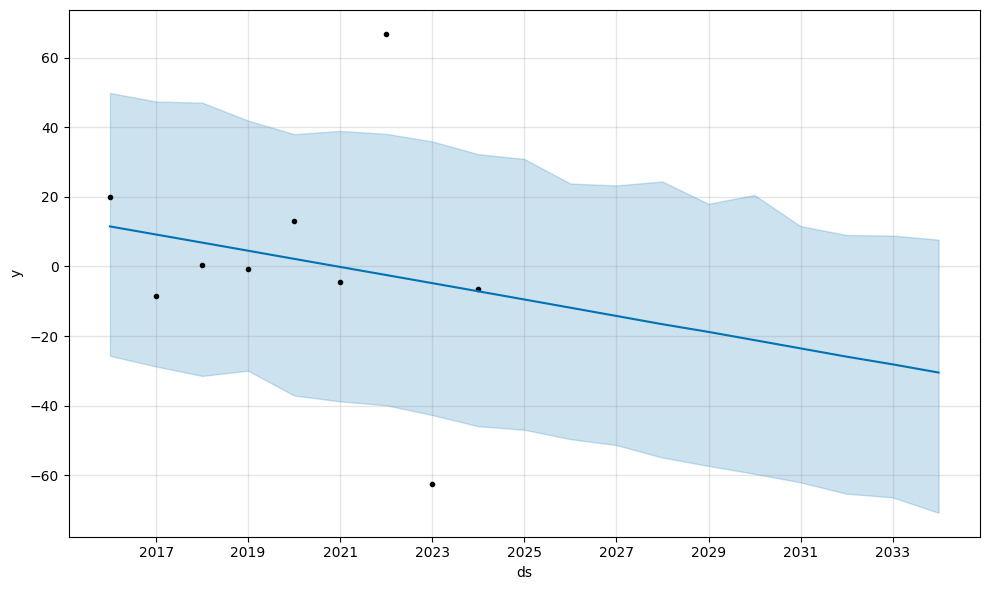

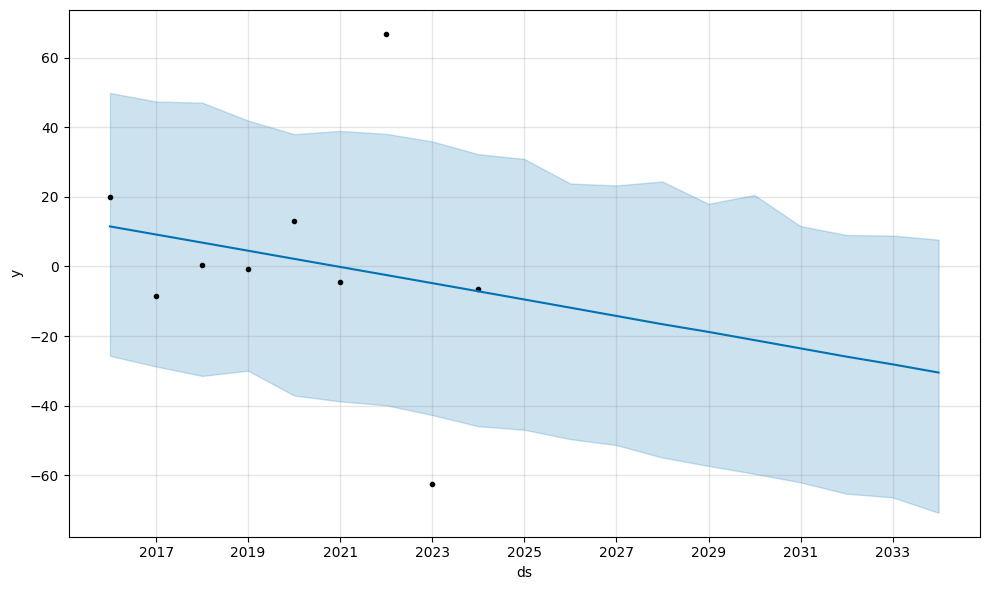

In [18]:
# Install the correct package
!pip install prophet

# Import Prophet correctly
from prophet import Prophet

# Prepare data for Prophet
prophet_df = urban_change_df.rename(columns={'Year2': 'ds', 'Change': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], format='%Y')  # Convert 'Year2' to datetime format

# Initialize and fit the model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame for future predictions (e.g., next 10 years)
future = model.make_future_dataframe(periods=10, freq='Y')

# Predict future urbanization changes
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)

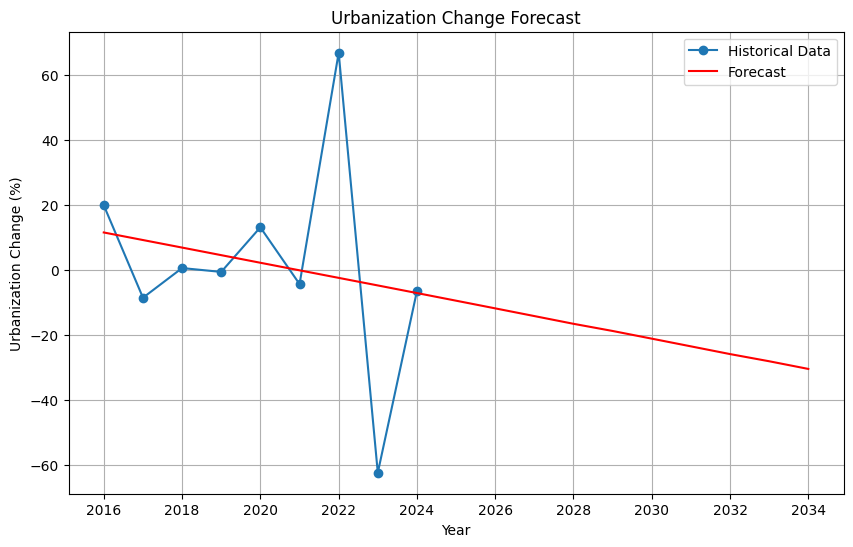

In [19]:
import matplotlib.pyplot as plt

# Ensure 'Year2' column is in datetime format
urban_change_df['Year2'] = pd.to_datetime(urban_change_df['Year2'], format='%Y')

# Example of plotting forecasted values
plt.figure(figsize=(10, 6))

# Plot historical data with proper datetime axis
plt.plot(urban_change_df['Year2'], urban_change_df['Change'], marker='o', label='Historical Data')

# Plot forecasted data
plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Forecast')

plt.xlabel('Year')
plt.ylabel('Urbanization Change (%)')
plt.title('Urbanization Change Forecast')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()
